Gradient boosting for regression works by combining multiple decision trees to create a strong predictive model. Here's a step-by-step explanation of how it works:

1. **Initialization**:
   - The process starts with an initial prediction, often a simple one, like the mean of the target values for all training samples. This initial prediction is represented by the constant value.

2. **Fitting Weak Learners**:
   - In each iteration (or boosting round), a decision tree, referred to as a "weak learner," is trained on the dataset.
   - The decision tree is fit to the residuals of the current model. Residuals are the differences between the actual target values and the current predictions.
   - The decision tree's goal is to model the patterns in the residuals, effectively capturing the errors made by the current model.

3. **Weighted Additions**:
   - The predictions of the newly trained decision tree are weighted and added to the current model. The weight is determined by a parameter (often called the "learning rate") that controls the step size in each iteration.
   - The learning rate helps prevent overfitting and can be tuned to optimize performance.

4. **Update Residuals**:
   - The residuals for the entire dataset are updated using the predictions of the new decision tree. This effectively adjusts the target values to focus on the errors that were not captured by the current model.

5. **Iteration**:
   - The process is repeated for a fixed number of iterations (boosting rounds), or until a certain stopping criterion is met. In each iteration, a new decision tree is added to the ensemble, further refining the model's predictions.

6. **Final Prediction**:
   - The final prediction is obtained by summing the predictions of all the decision trees created during the boosting process. This ensemble of decision trees provides a much more accurate and flexible model for regression.

7. **Hyperparameter Tuning**:
   - Several hyperparameters can be tuned to optimize the performance of the gradient boosting model, including the learning rate, the depth of the decision trees, and the number of boosting rounds.

The key idea behind gradient boosting for regression is that it minimizes a regression loss function (commonly mean squared error) by iteratively improving the model with each boosting round. By sequentially adding decision trees and focusing on the residuals of the previous model, gradient boosting can capture complex, non-linear relationships in the data and build a highly accurate regression model.

This approach typically leads to strong predictive performance and is widely used in various applications where regression tasks are required. Popular libraries for gradient boosting include XGBoost, LightGBM, and scikit-learn's GradientBoostingRegressor.

Let us see all this steps

# Making a regression dataset problem

In [1]:
import numpy as np

In [2]:
np.random.seed(42)
X = np.random.rand(100) - 0.5
X

array([-0.12545988,  0.45071431,  0.23199394,  0.09865848, -0.34398136,
       -0.34400548, -0.44191639,  0.36617615,  0.10111501,  0.20807258,
       -0.47941551,  0.46990985,  0.33244264, -0.28766089, -0.31817503,
       -0.31659549, -0.19575776,  0.02475643, -0.06805498, -0.20877086,
        0.11185289, -0.36050614, -0.20785535, -0.13363816, -0.04393002,
        0.28517596, -0.30032622,  0.01423444,  0.09241457, -0.45354959,
        0.10754485, -0.32947588, -0.43494841,  0.44888554,  0.46563203,
        0.30839735, -0.19538623, -0.40232789,  0.18423303, -0.05984751,
       -0.37796177, -0.00482309, -0.46561148,  0.4093204 , -0.24122002,
        0.16252228, -0.18828892,  0.02006802,  0.04671028, -0.31514554,
        0.46958463,  0.27513282,  0.43949894,  0.39482735,  0.09789998,
        0.42187424, -0.4115075 , -0.30401714, -0.45477271, -0.17466967,
       -0.11132271, -0.22865097,  0.32873751, -0.14324667, -0.21906549,
        0.04269608, -0.35907578,  0.30219698, -0.42544936,  0.48

 - Using a non-linear relation between the variables with some randomness

In [3]:
y = 3*X**2 + 0.05*np.random.randn(100)
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

 - Let us make a dataframe to see what's going

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame()

In [6]:
df["X"] = X
df["y"] = y
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


 - So, we are using a parabolic relation between the variables with some randomness.

   Let us see the scatter plot, how things look:

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'X vs Y')

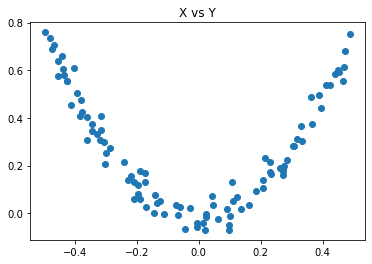

In [8]:
plt.scatter(X,y)
plt.title("X vs Y")

1. **Initialization**:
   - The process starts with an initial prediction, often a simple one, like the mean of the target values for all training samples. This initial prediction is represented by the constant value.


In [9]:
df['pred1'] = df['y'].mean()
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


 - Calculating residuals based on the first predictions 

In [10]:
df['res1'] = df['y'] - df['pred1']
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


 - Plot to see how the first model ( which is simply the mean value ) performs

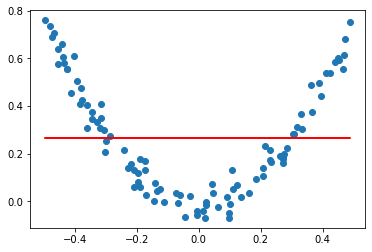

In [11]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

2. **Fitting Weak Learners**:
   - In each iteration (or boosting round), a decision tree, referred to as a "weak learner," is trained on the dataset.
   - The decision tree is fit to the residuals of the current model. Residuals are the differences between the actual target values and the current predictions.
   - The decision tree's goal is to model the patterns in the residuals, effectively capturing the errors made by the current model.

In [12]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


 - Training first decision tree on the residuals of the previous model

In [13]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

 - So job of this decision tree is to predict the residuals of the previous model.
   Let us see its tree plot

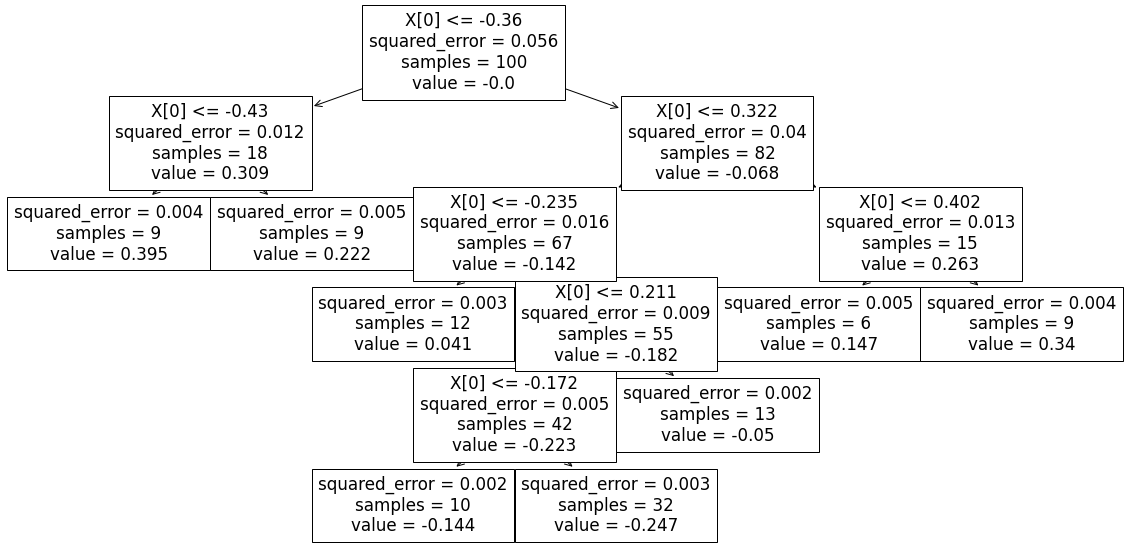

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree1)
plt.show()

3. **Weighted Additions**:
   - The predictions of the newly trained decision tree are weighted and added to the current model. The weight is determined by a parameter (often called the "learning rate") that controls the step size in each iteration.
   - The learning rate helps prevent overfitting and can be tuned to optimize performance.

 - Let us first visually see how well this tree predicts the results

Generating X_test

In [15]:
X_test = np.linspace(-0.5, 0.5, 500)

Let us see this tree prediction on this X_test

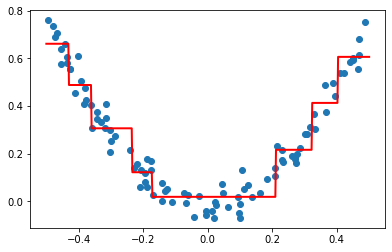

In [16]:
y_pred = df['y'].mean() + tree1.predict(X_test.reshape(500, 1))
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

We see, even the first model is able to capture the curve somewhat

 - Adding pred2 column now (Considering learning rate as 1 only as of now)

In [17]:
df['pred2'] = df['y'].mean() + tree1.predict(df['X'].values.reshape(100,1))   
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018320
4,-0.343981,0.343986,0.265458,0.078528,0.305965
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320
96,0.022733,-0.002305,0.265458,-0.267763,0.018320
97,-0.072459,0.032809,0.265458,-0.232650,0.018320
98,-0.474581,0.689516,0.265458,0.424057,0.660912



4. **Update Residuals**:
   - The residuals for the entire dataset are updated using the predictions of the new decision tree. This effectively adjusts the target values to focus on the errors that were not captured by the current model.

In [18]:
df['res2'] = df['y'] - df['pred2']
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320,-0.058995
96,0.022733,-0.002305,0.265458,-0.267763,0.018320,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018320,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028603


5. **Iteration**:
   - The process is repeated for a fixed number of iterations (boosting rounds), or until a certain stopping criterion is met. In each iteration, a new decision tree is added to the ensemble, further refining the model's predictions.


Second decision tree is trained on the residuals of the previous model

In [19]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

6. **Final Prediction**:
   - The final prediction is obtained by summing the predictions of all the decision trees created during the boosting process. This ensemble of decision trees provides a much more accurate and flexible model for regression.


In [20]:
y_pred = df['y'].mean() + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

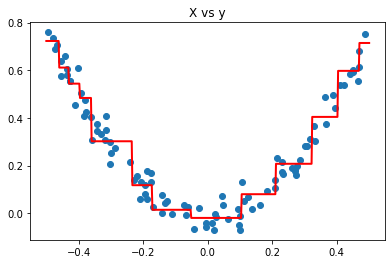

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

Thus this recursive process of training the models on the previous model's residuals keeps increasing the predictive performance and will smoothen this red prediction curve.

 - Using a function to give parameters and train multiple models with some learning rate

In [22]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


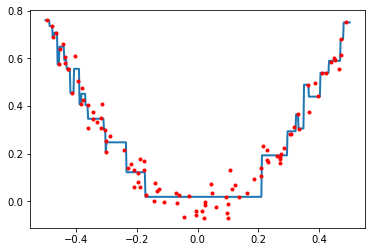

4


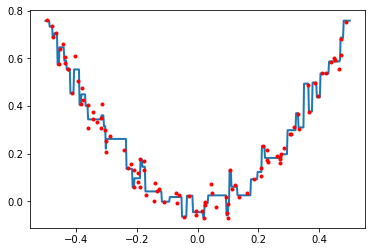

3


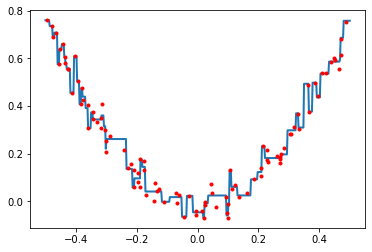

2


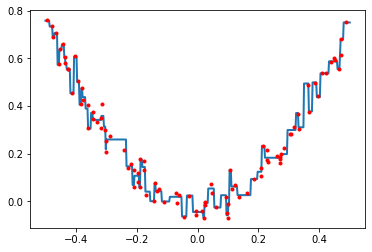

1


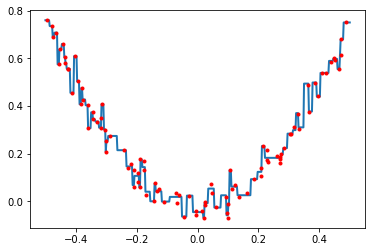

In [23]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)
     

# Let us see the actual Gradient Boost Algorithm

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
gbr = GradientBoostingRegressor(n_estimators=50,max_leaf_nodes=8)

In [88]:
X

array([-0.12545988,  0.45071431,  0.23199394,  0.09865848, -0.34398136,
       -0.34400548, -0.44191639,  0.36617615,  0.10111501,  0.20807258,
       -0.47941551,  0.46990985,  0.33244264, -0.28766089, -0.31817503,
       -0.31659549, -0.19575776,  0.02475643, -0.06805498, -0.20877086,
        0.11185289, -0.36050614, -0.20785535, -0.13363816, -0.04393002,
        0.28517596, -0.30032622,  0.01423444,  0.09241457, -0.45354959,
        0.10754485, -0.32947588, -0.43494841,  0.44888554,  0.46563203,
        0.30839735, -0.19538623, -0.40232789,  0.18423303, -0.05984751,
       -0.37796177, -0.00482309, -0.46561148,  0.4093204 , -0.24122002,
        0.16252228, -0.18828892,  0.02006802,  0.04671028, -0.31514554,
        0.46958463,  0.27513282,  0.43949894,  0.39482735,  0.09789998,
        0.42187424, -0.4115075 , -0.30401714, -0.45477271, -0.17466967,
       -0.11132271, -0.22865097,  0.32873751, -0.14324667, -0.21906549,
        0.04269608, -0.35907578,  0.30219698, -0.42544936,  0.48

In [89]:
X.reshape(-1,1)

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [90]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [91]:
gbr.fit(X.reshape(-1,1),y)

GradientBoostingRegressor(max_leaf_nodes=8, n_estimators=50)

In [92]:
y_pred = gbr.predict(X_test.reshape(-1,1))

Text(0.5, 1.0, 'X vs y')

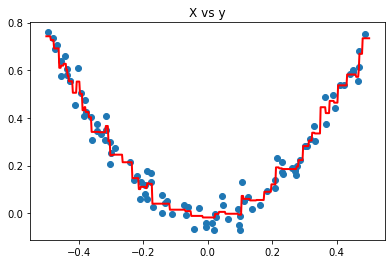

In [93]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [94]:
gbr.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_leaf_nodes=8,
                              random_state=RandomState(MT19937) at 0x7F96A833B040)    ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_leaf_nodes=8,
                              random_state=RandomState(MT19937) at 0x7F96A833B040)    ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_leaf_nodes=8,
                              random_state=RandomState(MT19937) at 0x7F96A833B040)    ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_leaf_nodes=8,
                              random_state=RandomState(MT19937) at 0x7F96A833B040)    ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_leaf_nodes=8,
                              random_state=RandomState(MT19937) at 0x7F96A833B040)    ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_leaf_nodes=8,
                              ran

In [95]:
gbr.learning_rate

0.1

In [96]:
gbr.train_score_

array([0.04636343, 0.03893083, 0.03250558, 0.02729584, 0.0231556 ,
       0.01920051, 0.01631744, 0.01362611, 0.01144598, 0.00963395,
       0.00815291, 0.00696367, 0.00595375, 0.00519832, 0.00449432,
       0.00398539, 0.00349229, 0.00305532, 0.00269176, 0.00245179,
       0.00218898, 0.00197388, 0.00181797, 0.0016707 , 0.00154488,
       0.00144538, 0.00136404, 0.00128495, 0.00123136, 0.00118286,
       0.00114142, 0.00108979, 0.00105013, 0.00102452, 0.00100129,
       0.00097507, 0.00095953, 0.00092571, 0.00090666, 0.0008892 ,
       0.00086736, 0.00084349, 0.00082505, 0.00081259, 0.00078526,
       0.00077501, 0.00076216, 0.00073225, 0.00072091, 0.00071312])

In [101]:
gbr.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_leaf_nodes=8,
                             random_state=RandomState(MT19937) at 0x7F96A833B040)    ],
      dtype=object)